In [315]:
import pandas as pd
import scipy as sc
import numpy as np
from scipy.stats import mode
%matplotlib inline

import matplotlib.pyplot as plt 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [201]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [202]:
train.count()

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [203]:
test.count()

Item_Identifier              5681
Item_Weight                  4705
Item_Fat_Content             5681
Item_Visibility              5681
Item_Type                    5681
Item_MRP                     5681
Outlet_Identifier            5681
Outlet_Establishment_Year    5681
Outlet_Size                  4075
Outlet_Location_Type         5681
Outlet_Type                  5681
dtype: int64

In [3]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
train.shape, test.shape, data.shape

((8523, 13), (5681, 12), (14204, 13))

In [329]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
Item_Type_Combined              0
dtype: int64

In [283]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(miss_bool))
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg[x])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [284]:
Item_Weight_df  =  data[['Item_Identifier' ,'Item_Weight' , 'Item_Visibility']]
                       

In [285]:
Item_Weight_df.describe()

,Item_Weight,Item_Visibility
count,11765.000000,14204.000000
mean,12.792854,0.069710
std,4.652502,0.049728
min,4.555000,0.003575
25%,8.710000,0.031145
50%,12.600000,0.057194
75%,16.750000,0.096930
max,21.350000,0.328391


In [286]:
reshape_visibility =data['Item_Visibility'][data['Item_Weight'].notnull()].values.reshape( (11765 , 1) )

In [288]:
reshape_weight = data['Item_Weight'].dropna().values.reshape( (11765 , 1) )

In [289]:
reshape_weight

array([[  9.3 ],
       [  5.92],
       [ 17.5 ],
       ..., 
       [ 10.  ],
       [ 15.3 ],
       [  9.5 ]])

In [290]:
reshape_weight_predict = data['Item_Visibility' ]

In [291]:
reshape_weight_predict = reshape_weight_predict.values.reshape( (14204 , 1) )

In [292]:
Item_Weight_df[Item_Weight_df['Item_Weight'].isnull()].count()

Item_Identifier    2439
Item_Weight           0
Item_Visibility    2439
dtype: int64

In [293]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=10 , weights='distance')
neigh.fit( reshape_visibility , reshape_weight)


#data.loc[miss_bool,'Item_Weight'] = data.loc[predicted_value,'Item_Identifier']

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

In [303]:
missing_value  =  data['Item_Weight'].isnull()

missing_value.head()

0    False
1    False
2    False
3    False
4    False
Name: Item_Weight, dtype: bool

In [295]:
predicted_value  = neigh.predict(reshape_weight_predict)

predicted_value_df = pd.DataFrame(predicted_value , columns=[ 'Pred_Weight'])


data.loc[missing_value , 'Item_Weight'] = predicted_value_df['Pred_Weight']

In [17]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
Predicted_Item_Weight         object
dtype: object

In [6]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [330]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 2
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13688
Item_Weight                   2741
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      3
Outlet_Type                      4
source                           2
Item_Type_Combined               3
dtype: int64

In [309]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029853DFBEB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000029854B3D828>]], dtype=object)

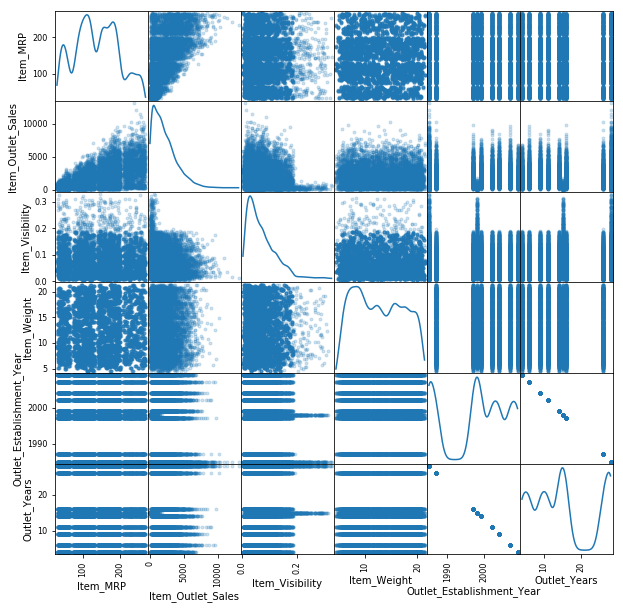

In [18]:
scatter_matrix(data, alpha=0.2, figsize=(10, 10), diagonal='kde')

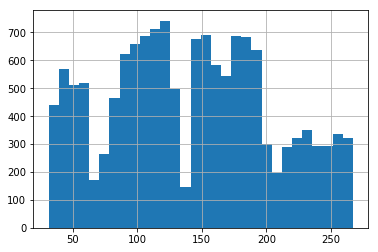

In [210]:
data['Item_MRP'].hist( normed=False, bins=30)

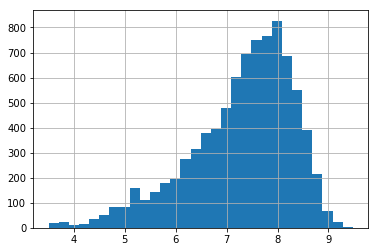

In [211]:
np.log(data['Item_Outlet_Sales']).hist( normed=False, bins=30)

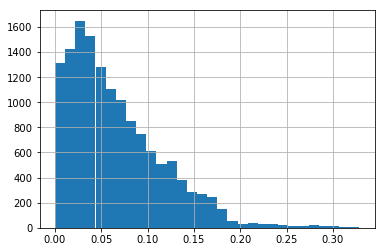

In [212]:
data['Item_Visibility'].hist( normed=False, bins=30)

In [9]:
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
zero_visibility = (data['Item_Visibility'] == 0)
print ('Number of 0 values initially: %d'%sum(zero_visibility))
data.loc[zero_visibility,'Item_Visibility'] = data.loc[zero_visibility,'Item_Identifier'].apply(lambda x: visibility_avg[x])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


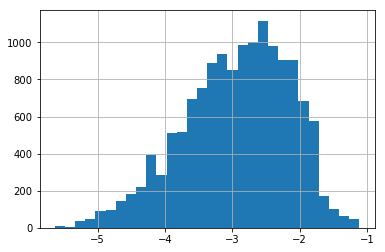

In [214]:
    np.log(data['Item_Visibility']).hist( normed=False, bins=30)

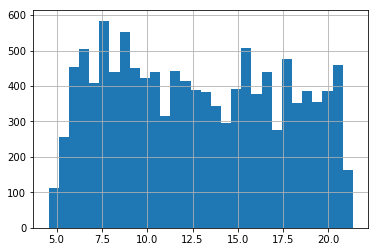

In [215]:
data['Item_Weight'].hist( normed=False, bins=30)

In [10]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

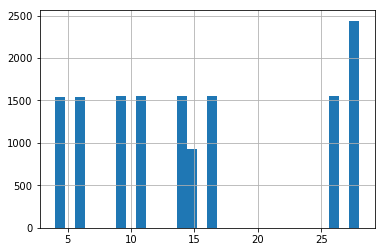

In [11]:
data['Outlet_Years'].hist( normed=False, bins=30)

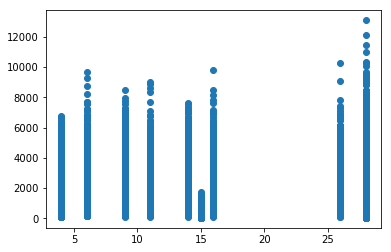

In [218]:
plt.scatter(data['Outlet_Years'] , data['Item_Outlet_Sales'])

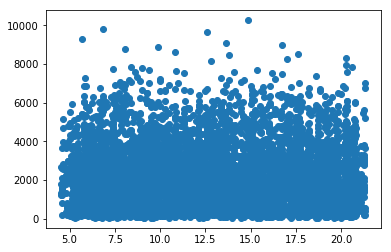

In [219]:
plt.scatter(data['Item_Weight'] , data['Item_Outlet_Sales'])

In [220]:
train[['Item_MRP', 'Item_Outlet_Sales']].corr()
#plt.scatter(np.log(data['Item_Visibility']) , np.log(data['Item_Outlet_Sales']))

,Item_MRP,Item_Outlet_Sales
Item_MRP,1.000000,0.567574
Item_Outlet_Sales,0.567574,1.000000


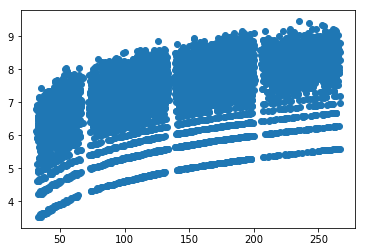

In [221]:
plt.scatter(data['Item_MRP'] , np.log(data['Item_Outlet_Sales'] ))

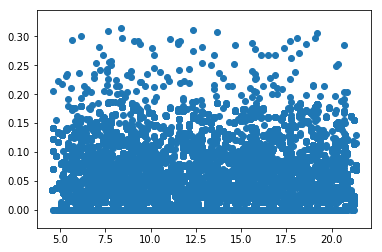

In [8]:
plt.scatter(data['Item_Weight'] , data['Item_Visibility'] )

In [222]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [223]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [311]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [312]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [322]:
data['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [324]:
data.groupby(['Item_Type']).sum()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
Item_Type,,,,,
Baking Goods,138419.6456,1.265525e+06,78.867310,13370.468813,2169639
Breads,58818.1772,5.532372e+05,30.482779,4742.919560,831066
Breakfast,25665.2926,2.322990e+05,15.845909,2454.475302,371566
Canned,150265.0946,1.444151e+06,77.391283,13469.093099,2165674
Dairy,167254.4132,1.522594e+06,85.408414,14881.842089,2269562
Frozen Foods,194602.4912,1.825735e+06,102.038868,17889.799644,2848816
Fruits and Vegetables,290484.4284,2.820060e+06,146.389984,26306.495937,4021585
Hard Drinks,49700.8012,4.577934e+05,25.460786,4205.948955,723259
Health and Hygiene,114206.7316,1.045200e+06,51.232574,11281.479643,1714100


In [325]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [226]:
#Outlet_Identifier               10
#Outlet_Location_Type             3
#Outlet_Size                      4
#Outlet_Type                      4

data['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [227]:
data['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [228]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [229]:
data['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [230]:
#data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Item_Type' ])

In [317]:
data.count()

Item_Fat_Content             14204
Item_Identifier              14204
Item_MRP                     14204
Item_Outlet_Sales             8523
Item_Type                    14204
Item_Visibility              14204
Item_Weight                  14204
Outlet_Establishment_Year    14204
Outlet_Identifier            14204
Outlet_Location_Type         14204
Outlet_Size                  14204
Outlet_Type                  14204
source                       14204
Outlet_Years                 14204
dtype: int64

In [232]:
sc.stats.ttest_rel(data_Item_weight_present['Item_Weight'], data_Item_weight_present['Item_MRP']) 

Ttest_relResult(statistic=-223.83975858514646, pvalue=0.0)

In [234]:
#Determine the average weight per item:
#item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

#Get a boolean variable specifying missing Item_Weight values
#miss_bool = data['Item_Weight'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
#print 'Orignal #missing: %d'% sum(miss_bool)
#data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight[x])
#print 'Final #missing: %d'% sum(data['Item_Weight'].isnull())

In [270]:
grouped  = data.groupby(['Outlet_Type'])

In [296]:
grouped['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           880
Supermarket Type1  Small          3100
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [326]:
outlet_size_mode = data.dropna(subset=['Outlet_Size']).pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) , dropna=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [327]:
miss_bool = data['Outlet_Size'].isnull() 
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [328]:
miss_outlet_size  = data['Outlet_Size'].isnull()

In [321]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
Outlet_Years                   int64
log_Item_MRP                 float64
log_Item_Outlet_Sales        float64
log_Item_Visibility          float64
dtype: object

In [331]:
data['log_Item_MRP'] = np.log(data['Item_MRP'])

In [332]:
data['log_Item_Outlet_Sales'] = np.log(data['Item_Outlet_Sales'])

In [333]:
data['log_Item_Visibility'] = np.log(data['Item_Visibility'])

In [334]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
train['log_Item_MRP', 'log_Item_Outlet_Sales'].corr()

KeyError: ('log_Item_MRP', 'log_Item_Outlet_Sales')